In [2]:
## Importing modules

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
## Authenticate & Create data frame using data in sheets

from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('DL_Ex-1').sheet1
data = worksheet.get_all_values()
dataset1=pd.DataFrame(data[1:],columns=data[0])
dataset1=dataset1.astype({'input':'float'})
dataset1=dataset1.astype({'output':'float'})
dataset1.head()

,input,output
0,1.0,17.0
1,2.0,21.0
2,3.0,36.0
3,4.0,49.0
4,5.0,52.0


In [4]:
## Assign X & Y Values

x = dataset1[['input']].values
y = dataset1[['output']].values
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [6]:
## Normalize the values and split the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(x_train)
x_train1 = Scaler.transform(x_train)

In [7]:
## Create a neural network and train it.
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(x_train1,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 517ms/step - loss: 13893.1777
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 13890.2695
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 13888.2100
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 13886.5332
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 13885.0801
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 13883.7617
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 13882.5674
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 13881.4473
Epoch 9/200
1/1 [==============================] - 0s 20ms/step - loss: 13880.3848
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 13879.3809
Epoch 11/200
1/1 [==============================] - 0s 10ms/step - loss: 13878.4307
Epoch 12/200
1/1 [==============================] - 0s 10ms/step - loss: 13877.5117
Epoch 1

<Axes: >

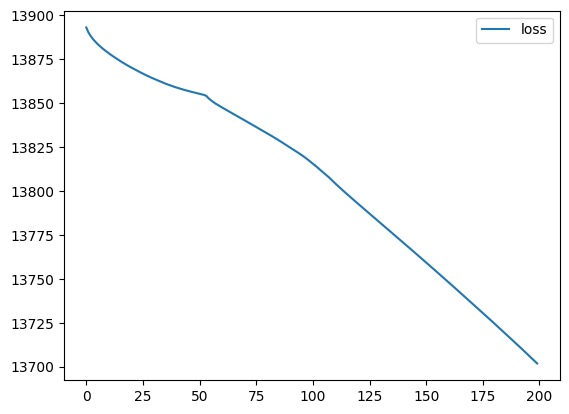

In [8]:
## Plot the loss

loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [11]:
## Predict for some value

ai_brain.evaluate(x_test1,y_test)


1/1 [==============================] - 0s 143ms/step - loss: 18030.1621


18030.162109375

In [10]:
x_test1 = Scaler.transform(x_test)
x_n1 = [[30]]
x_n1_1 = Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 419ms/step


array([[1.0392984]], dtype=float32)